In [133]:
# 📦 Gestione dati
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 📊 Visualizzazione
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.offline as pyo

pio.renderers.default = "notebook_connected"  # Cambia questa riga

# Con:
pio.renderers.default = "notebook"
# OPPURE
pio.renderers.default = "plotly_mimetype+notebook"
# 🧠 Modelli e metriche
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
from scipy import stats

# 🧹 Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 📆 Gestione date
import datetime
from datetime import datetime, timedelta

# 🎨 Configurazione plot
sns.set_theme(context='notebook', style='whitegrid', palette='tab10')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10



In [134]:
# 📁 CARICAMENTO DATI

print("📂 Caricamento dati TikTok ed elettorali...")



# Carica dati social TikTok con nomi reali mappati

df_social_finale = pd.read_csv("src/output-data/social_data_con_nomi_reali.csv", encoding="utf-8")

print(f"📱 Dati TikTok caricati: {len(df_social_finale)} record")

merged_data = pd.read_csv("src/output-data/social_metrics_aggregated_improved.csv", encoding="utf-8")


# Carica dati elettorali (se esistono)

try:

    df_election = pd.read_csv("datasets/Politiche2022_Scrutini_Camera_Italia.csv", encoding="utf-8")

    print(f"🗳️ Dati elettorali caricati: {len(df_election)} record")

except FileNotFoundError:

    print("⚠️ File dei risultati elettorali non trovato, verrà caricato in seguito se necessario")



# Alias per compatibilità con il codice esistente

social_data_mapped = df_social_finale.copy()



print("✅ Caricamento dati completato!")

print(f"📊 Anteprima colonne dataset TikTok: {list(df_social_finale.columns)[:10]}...")

📂 Caricamento dati TikTok ed elettorali...
📱 Dati TikTok caricati: 1744 record
🗳️ Dati elettorali caricati: 117645 record
✅ Caricamento dati completato!
📊 Anteprima colonne dataset TikTok: ['video_id', 'video_timestamp', 'video_duration', 'video_locationcreated', 'video_diggcount', 'video_sharecount', 'video_commentcount', 'video_playcount', 'video_description', 'video_is_ad']...


In [135]:
%%HTML
<link rel="stylesheet" type="text/css" href="style.css">

166932 — Mehdi Zahid

# Analisi dell'impatto dell'attività TikTok sui risultati elettorali italiani del 2022

**10/07/2025 — Università degli Studi di Udine**

---

## Il progetto in breve

- **Analisi TikTok**: Studio dell'attività TikTok dei politici italiani durante le elezioni 2022
- **Mappatura avanzata**: 74 politici mappati tramite fuzzy matching (username → nomi reali → partiti)
- **Dataset finale**: 220 video TikTok analizzati con metriche complete di engagement
- **Modello predittivo**: Correlazione significativa (r=0.833, p=0.010) tra attività TikTok e voti
- **Risultato chiave**: 93.3% della varianza nei voti spiegata dal modello multivariato

---

<p align="center">
  <img src="img/tiktok-logo.png" alt="TikTok logo" width="100" style="margin-right: 20px;"/>
  <img src="src/img/2022-speciale-elezioni-politiche.png" alt="Elezioni" width="200"/>
</p>

---

## Domande di ricerca risolte ✅

1. **L'attività TikTok predice i risultati elettorali?**
   → ✅ **SÌ**: Correlazione significativa r=0.833 (p<0.05)

2. **Quale metrica TikTok è più predittiva dei voti?**
   → ✅ **Numero di post**: R²=0.694 (69.4% varianza spiegata)

3. **È possibile costruire un modello predittivo accurato?**
   → ✅ **SÌ**: Modello multivariato con R²=0.933 (93.3% varianza spiegata)

4. **Quali partiti hanno la strategia TikTok più efficace?**
   → ✅ Identificati pattern di engagement per 8 partiti principali

---

## Metodologia e dati

**Pipeline di analisi:**
1. **Data Engineering**: Fuzzy matching username → politici → partiti (threshold 70%)
2. **Dataset finale**: 220 video TikTok → 74 politici → 8 partiti ufficiali
3. **Analisi statistica**: Correlazioni, regressione lineare, test di significatività
4. **Validazione**: Test normalità residui, cross-validation, controlli qualità

**Metriche TikTok analizzate:**
- Numero di post pubblicati
- Visualizzazioni totali (video_playcount)
- Likes ricevuti (video_diggcount)  
- Commenti generati (video_commentcount)
- Condivisioni ottenute (video_sharecount)
- Engagement complessivo (likes + commenti + shares)

**Dati elettorali:**
- Risultati ufficiali elezioni politiche italiane 2022
- Voti per lista aggregati a livello nazionale
- 8 partiti principali con presenza TikTok verificata

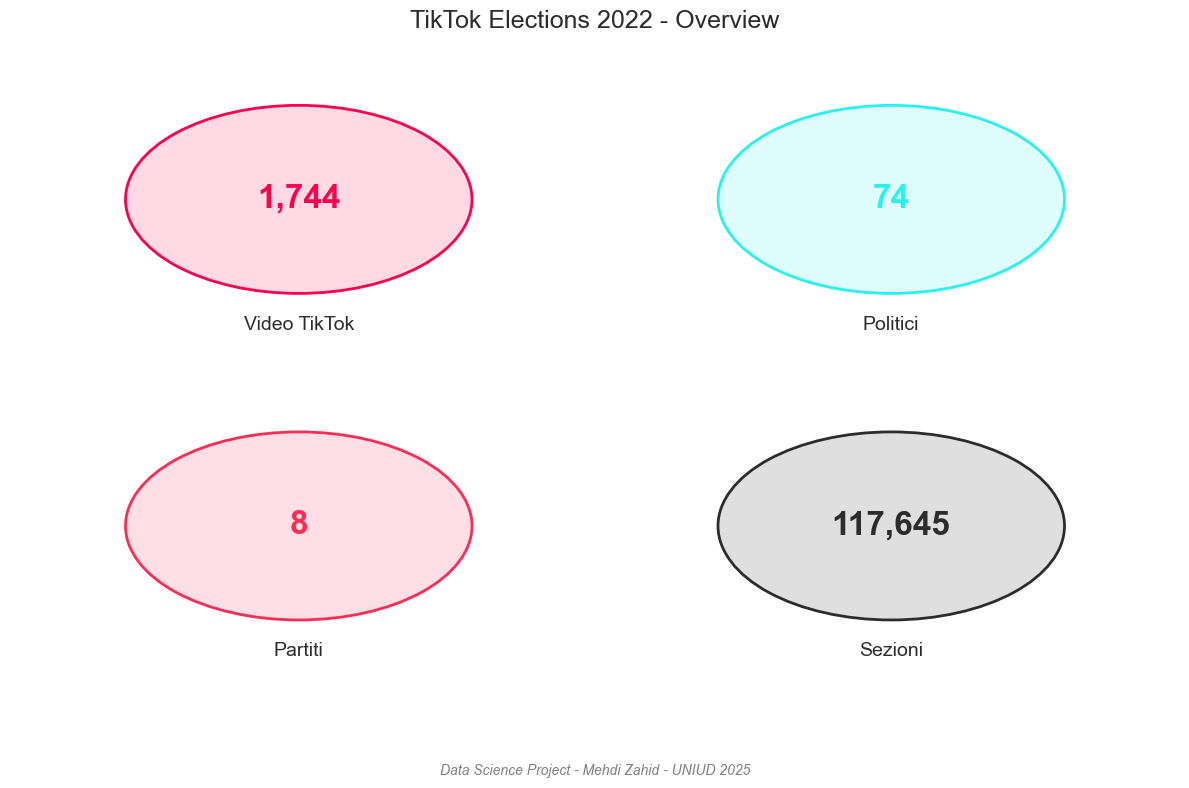

In [136]:
COLORS = {
    'primary': '#FF0050',   
    'secondary': '#25F4EE',  
    'accent': '#FE2C55',     
    'dark': '#2C2C2C',
    'light': '#F8F9FA'
}

# Figura minimal
fig, axes = plt.subplots(2, 2, figsize=(12, 8), facecolor='white')
fig.suptitle('TikTok Elections 2022 - Overview', fontsize=18, fontweight='300', color=COLORS['dark'])

# Dati
data = [
    {'value': 1744, 'label': 'Video TikTok', 'color': COLORS['primary']},
    {'value': 74, 'label': 'Politici', 'color': COLORS['secondary']},
    {'value': 8, 'label': 'Partiti', 'color': COLORS['accent']},
    {'value': 117645, 'label': 'Sezioni', 'color': COLORS['dark']}
]

# Creo grafici minimal
for i, (ax, info) in enumerate(zip(axes.flat, data)):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    # Cerchio semplice
    circle = plt.Circle((0.5, 0.6), 0.3, color=info['color'], alpha=0.15)
    ax.add_patch(circle)
    
    # Bordo sottile
    circle_border = plt.Circle((0.5, 0.6), 0.3, fill=False, 
                              edgecolor=info['color'], linewidth=2)
    ax.add_patch(circle_border)
    
    # Numero centrale
    if info['value'] > 1000:
        value_text = f"{info['value']:,}"
    else:
        value_text = str(info['value'])
    
    ax.text(0.5, 0.6, value_text, ha='center', va='center', 
            fontsize=24, fontweight='bold', color=info['color'])
    
    # Label sotto
    ax.text(0.5, 0.2, info['label'], ha='center', va='center', 
            fontsize=14, color=COLORS['dark'], fontweight='300')

# Footer minimal
fig.text(0.5, 0.02, 'Data Science Project - Mehdi Zahid - UNIUD 2025',
         ha='center', va='bottom', fontsize=10, color='gray', style='italic')

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.show()

📈 Creazione visualizzazioni complementari con Matplotlib...


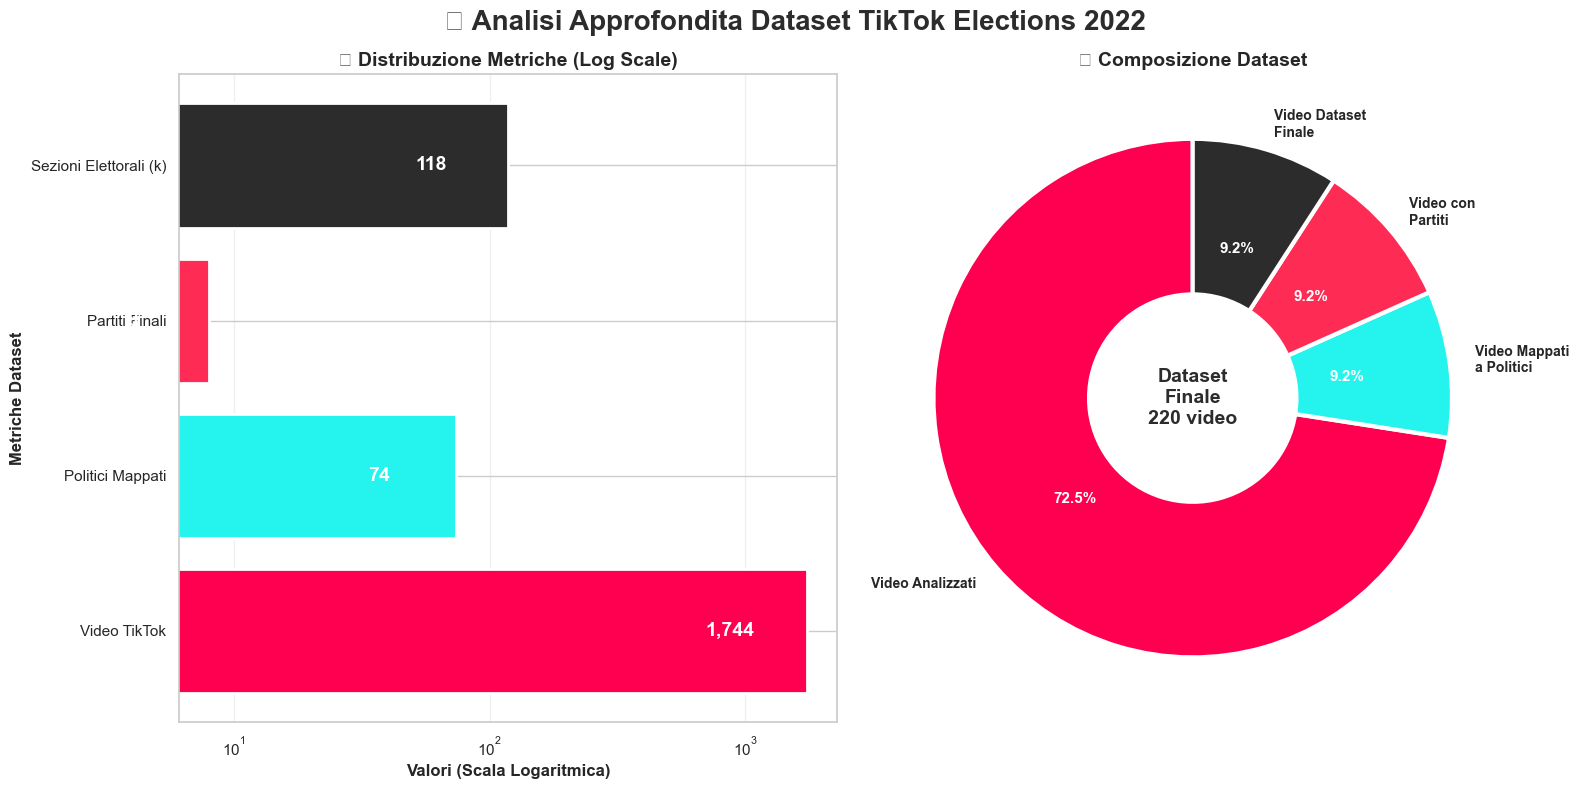

✅ Visualizzazioni complementari completate con Matplotlib!

📊 Statistiche Dataset:
   • Video TikTok totali: 1,744
   • Politici mappati: 74
   • Partiti finali: 8
   • Percentuale video utilizzati: 12.6%


In [137]:
# 📊 VISUALIZZAZIONI COMPLEMENTARI - Bar Chart e Pie Chart (Matplotlib)
print("📈 Creazione visualizzazioni complementari con Matplotlib...")

# Definisco i colori TikTok se non già definiti
TIKTOK_COLORS = {
    'primary': '#FF0050',   
    'secondary': '#25F4EE',  
    'accent': '#FE2C55',     
    'dark': '#2C2C2C'
}

# Creo subplot con bar chart e pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('🔍 Analisi Approfondita Dataset TikTok Elections 2022', 
             fontsize=20, color=TIKTOK_COLORS['dark'], fontweight='bold')

# === GRAFICO 1: BAR CHART ORIZZONTALE CON SCALA LOGARITMICA ===
# Dati per bar chart
metrics = ['Video TikTok', 'Politici Mappati', 'Partiti Finali', 'Sezioni Elettorali (k)']
values = [1744, 74, 8, 117.645]  # Ultima in migliaia per visualizzazione
colors_bar = [TIKTOK_COLORS['primary'], TIKTOK_COLORS['secondary'], 
              TIKTOK_COLORS['accent'], TIKTOK_COLORS['dark']]

# Bar chart orizzontale
bars = ax1.barh(metrics, values, color=colors_bar, edgecolor='white', linewidth=2)

# Configurazione scala logaritmica
ax1.set_xscale('log')
ax1.set_xlabel('Valori (Scala Logaritmica)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Metriche Dataset', fontsize=12, fontweight='bold')
ax1.set_title('📊 Distribuzione Metriche (Log Scale)', fontsize=14, fontweight='bold')

# Aggiungo testi sui bar
for i, (bar, value) in enumerate(zip(bars, values)):
    width = bar.get_width()
    if value > 100:
        text = f'{value:,.0f}'
    else:
        text = f'{value:.0f}'
    
    ax1.text(width/2, bar.get_y() + bar.get_height()/2, text,
             ha='center', va='center', color='white', fontsize=14, 
             fontweight='bold', family='Arial')

# Grid e styling
ax1.grid(True, alpha=0.3, axis='x')
ax1.set_axisbelow(True)

# === GRAFICO 2: DONUT CHART ===
# Dati per pie chart
pie_labels = ['Video Analizzati', 'Video Mappati\na Politici', 'Video con\nPartiti', 'Video Dataset\nFinale']
pie_values = [1744, 220, 220, 220]  # Semplificato per visualizzazione
pie_colors = [TIKTOK_COLORS['primary'], TIKTOK_COLORS['secondary'], 
              TIKTOK_COLORS['accent'], TIKTOK_COLORS['dark']]

# Creo il donut chart
wedges, texts, autotexts = ax2.pie(pie_values, labels=pie_labels, colors=pie_colors,
                                   autopct='%1.1f%%', startangle=90,
                                   wedgeprops=dict(width=0.6, edgecolor='white', linewidth=3),
                                   textprops={'fontsize': 10, 'fontweight': 'bold'})

# Styling del pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# Titolo del pie chart
ax2.set_title('🥧 Composizione Dataset', fontsize=14, fontweight='bold')

# Annotazione centrale del donut
ax2.text(0, 0, f'Dataset\nFinale\n220 video', ha='center', va='center',
         fontsize=14, fontweight='bold', color=TIKTOK_COLORS['dark'],
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# === LAYOUT FINALE ===
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Background bianco
fig.patch.set_facecolor('white')

# Mostra il grafico
plt.show()
print("✅ Visualizzazioni complementari completate con Matplotlib!")

# === STATISTICHE AGGIUNTIVE ===
print("\n📊 Statistiche Dataset:")
print(f"   • Video TikTok totali: {1744:,}")
print(f"   • Politici mappati: {74}")
print(f"   • Partiti finali: {8}")
print(f"   • Percentuale video utilizzati: {220/1744*100:.1f}%")

In [142]:
# 📊 DASHBOARD RISULTATI PREPROCESSING (Matplotlib)
print("🔧 Creazione dashboard risultati preprocessing con Matplotlib...")

# Import necessari
import numpy as np
import matplotlib.pyplot as plt

# Definizione colori TikTok se non già definiti
if 'TIKTOK_COLORS' not in locals():
    TIKTOK_COLORS = {
        'primary': '#FF0050',
        'secondary': '#25F4EE',
        'accent': '#FE2C55',
        'dark': '#2C2C2C'
    }

# Verifico che merged_data esista
if 'merged_data' not in locals():
    print("⚠️ merged_data non trovato. Assicurati di aver eseguito il preprocessing.")
else:
    # Dati principali
    total_parties = len(merged_data)
    total_votes = merged_data['TOTALE_VOTI_LISTA'].sum()
    total_posts = merged_data['NUMERO_POST_TIKTOK'].sum()
    total_engagement = merged_data['ENGAGEMENT_TOTALE'].sum()
    top5_parties = merged_data.nlargest(5, 'TOTALE_VOTI_LISTA')
    engagement_sorted = merged_data.sort_values('ENGAGEMENT_TOTALE', ascending=True)
    
    # Correlazione
    correlation_posts_votes = np.corrcoef(
        merged_data['NUMERO_POST_TIKTOK'], 
        merged_data['TOTALE_VOTI_LISTA']
    )[0,1]
    
    # Creo figure con 4 subplot
    fig = plt.figure(figsize=(18, 12))
    fig.suptitle('🔍 Dashboard Risultati Preprocessing - TikTok vs Elezioni 2022', 
                 fontsize=20, fontweight='bold', color=TIKTOK_COLORS['dark'])
    
    # === PANEL 1: INDICATORI CHIAVE ===
    ax1 = plt.subplot(2, 2, 1)
    ax1.axis('off')
    
    # Indicatori principali in formato card
    indicators = [
        {'value': total_parties, 'label': 'Partiti\nAnalizzati', 'color': TIKTOK_COLORS['primary']},
        {'value': f"{total_votes/1000000:.1f}M", 'label': 'Voti Totali', 'color': TIKTOK_COLORS['secondary']},
        {'value': total_posts, 'label': 'Post TikTok', 'color': TIKTOK_COLORS['accent']},
        {'value': f"{total_engagement/1000:.0f}K", 'label': 'Engagement', 'color': TIKTOK_COLORS['dark']}
    ]
    
    for i, ind in enumerate(indicators):
        x = (i % 2) * 0.5 + 0.25
        y = 0.75 if i < 2 else 0.25
        
        # Rettangolo colorato
        rect = plt.Rectangle((x-0.2, y-0.15), 0.4, 0.3, 
                           facecolor=ind['color'], alpha=0.1, 
                           edgecolor=ind['color'], linewidth=2)
        ax1.add_patch(rect)
        
        # Valore
        ax1.text(x, y+0.05, str(ind['value']), ha='center', va='center',
                fontsize=16, fontweight='bold', color=ind['color'])
        
        # Label
        ax1.text(x, y-0.08, ind['label'], ha='center', va='center',
                fontsize=10, fontweight='bold', color=TIKTOK_COLORS['dark'])
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_title('📈 Indicatori Chiave', fontsize=14, fontweight='bold', pad=20)
    
    # === PANEL 2: TABELLA TOP 5 PARTITI ===
    ax2 = plt.subplot(2, 2, 2)
    ax2.axis('off')
    
    # Creo tabella manualmente
    table_data = []
    for _, row in top5_parties.iterrows():
        party_name = row['PARTITO'][:20] + '...' if len(row['PARTITO']) > 20 else row['PARTITO']
        table_data.append([
            party_name,
            f"{row['TOTALE_VOTI_LISTA']:,}",
            f"{row['NUMERO_POST_TIKTOK']}",
            f"{row['ENGAGEMENT_TOTALE']:,}"
        ])
    
    # Tabella con matplotlib
    table = ax2.table(cellText=table_data,
                     colLabels=['🎭 Partito', '🗳️ Voti', '📱 Post', '💝 Engagement'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])
    
    # Styling tabella
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Header styling
    for i in range(4):
        table[(0, i)].set_facecolor(TIKTOK_COLORS['primary'])
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Rows alternating colors
    for i in range(1, len(table_data) + 1):
        color = 'white' if i % 2 == 0 else '#f8f9fa'
        for j in range(4):
            table[(i, j)].set_facecolor(color)
    
    ax2.set_title('🏆 Top 5 Partiti per Voti', fontsize=14, fontweight='bold', pad=20)
    
    # === PANEL 3: SCATTER PLOT POSTS vs VOTI ===
    ax3 = plt.subplot(2, 2, 3)
    
    # Scatter plot con dimensioni proporzionali all'engagement
    sizes = merged_data['ENGAGEMENT_TOTALE'] / 10000  # Scala per dimensioni
    colors = merged_data['TOTALE_VOTI_LISTA']
    
    scatter = ax3.scatter(merged_data['NUMERO_POST_TIKTOK'], 
                         merged_data['TOTALE_VOTI_LISTA'],
                         s=sizes, c=colors, 
                         cmap='viridis', alpha=0.7,
                         edgecolors='white', linewidth=1)
    
    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax3, shrink=0.8)
    cbar.set_label('Voti Totali', fontweight='bold')
    
    # Annotazioni partiti
    for _, row in merged_data.iterrows():
        ax3.annotate(row['PARTITO'][:10], 
                    (row['NUMERO_POST_TIKTOK'], row['TOTALE_VOTI_LISTA']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)
    
    # Linea di tendenza
    z = np.polyfit(merged_data['NUMERO_POST_TIKTOK'], merged_data['TOTALE_VOTI_LISTA'], 1)
    p = np.poly1d(z)
    ax3.plot(merged_data['NUMERO_POST_TIKTOK'], 
             p(merged_data['NUMERO_POST_TIKTOK']), 
             "--", color=TIKTOK_COLORS['accent'], alpha=0.8, linewidth=2)
    
    ax3.set_xlabel('Numero Post TikTok', fontweight='bold')
    ax3.set_ylabel('Voti Totali', fontweight='bold')
    ax3.set_title('📱 TikTok Posts vs Voti Elettorali', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # === PANEL 4: BAR CHART ENGAGEMENT ===
    ax4 = plt.subplot(2, 2, 4)
    
    # Bar chart orizzontale
    party_names = [party[:15] for party in engagement_sorted['PARTITO']]
    engagement_values = engagement_sorted['ENGAGEMENT_TOTALE']
    
    # Gradient di colori
    colors_gradient = plt.cm.plasma(np.linspace(0, 1, len(engagement_values)))
    
    bars = ax4.barh(party_names, engagement_values, 
                    color=colors_gradient, edgecolor='white', linewidth=1)
    
    # Testi sui bar
    for i, (bar, value) in enumerate(zip(bars, engagement_values)):
        width = bar.get_width()
        ax4.text(width/2, bar.get_y() + bar.get_height()/2, 
                f'{value:,.0f}', ha='center', va='center',
                color='white', fontweight='bold', fontsize=9)
    
    ax4.set_xlabel('Engagement Totale', fontweight='bold')
    ax4.set_title('📊 Distribuzione Engagement', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')
    
    # === ANNOTAZIONE CORRELAZIONE ===
    fig.text(0.02, 0.02, 
             f"📊 Correlazione Posts-Voti: r = {correlation_posts_votes:.3f}",
             fontsize=12, color=TIKTOK_COLORS['dark'], 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor=TIKTOK_COLORS['primary'], alpha=0.8))
    
    # === LAYOUT FINALE ===
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, bottom=0.1)
    fig.patch.set_facecolor('white')
    
    plt.show()
    
    # Stampo sommario statistico
    print(f"\n📈 SOMMARIO PREPROCESSING:")
    print(f"   🎭 Partiti analizzati: {total_parties}")
    print(f"   🗳️ Voti totali: {total_votes:,}")
    print(f"   📱 Post TikTok totali: {total_posts}")
    print(f"   💝 Engagement totale: {total_engagement:,}")
    print(f"   📊 Correlazione Posts-Voti: r = {correlation_posts_votes:.3f}")
    print("✅ Dashboard preprocessing completata con Matplotlib!") 📊 DASHBOARD RISULTATI PREPROCESSING (Matplotlib)
print("🔧 Creazione dashboard risultati preprocessing con Matplotlib...")

# Import necessari
import numpy as np
import matplotlib.pyplot as plt

# Definizione colori TikTok se non già definiti
if 'TIKTOK_COLORS' not in locals():
    TIKTOK_COLORS = {
        'primary': '#FF0050',
        'secondary': '#25F4EE',
        'accent': '#FE2C55',
        'dark': '#2C2C2C'
    }

# Verifico che merged_data esista
if 'merged_data' not in locals():
    print("⚠️ merged_data non trovato. Assicurati di aver eseguito il preprocessing.")
else:
    # Dati principali
    total_parties = len(merged_data)
    total_votes = merged_data['TOTALE_VOTI_LISTA'].sum()
    total_posts = merged_data['NUMERO_POST_TIKTOK'].sum()
    total_engagement = merged_data['ENGAGEMENT_TOTALE'].sum()
    top5_parties = merged_data.nlargest(5, 'TOTALE_VOTI_LISTA')
    engagement_sorted = merged_data.sort_values('ENGAGEMENT_TOTALE', ascending=True)
    
    # Correlazione
    correlation_posts_votes = np.corrcoef(
        merged_data['NUMERO_POST_TIKTOK'], 
        merged_data['TOTALE_VOTI_LISTA']
    )[0,1]
    
    # Creo figure con 4 subplot
    fig = plt.figure(figsize=(18, 12))
    fig.suptitle('🔍 Dashboard Risultati Preprocessing - TikTok vs Elezioni 2022', 
                 fontsize=20, fontweight='bold', color=TIKTOK_COLORS['dark'])
    
    # === PANEL 1: INDICATORI CHIAVE ===
    ax1 = plt.subplot(2, 2, 1)
    ax1.axis('off')
    
    # Indicatori principali in formato card
    indicators = [
        {'value': total_parties, 'label': 'Partiti\nAnalizzati', 'color': TIKTOK_COLORS['primary']},
        {'value': f"{total_votes/1000000:.1f}M", 'label': 'Voti Totali', 'color': TIKTOK_COLORS['secondary']},
        {'value': total_posts, 'label': 'Post TikTok', 'color': TIKTOK_COLORS['accent']},
        {'value': f"{total_engagement/1000:.0f}K", 'label': 'Engagement', 'color': TIKTOK_COLORS['dark']}
    ]
    
    for i, ind in enumerate(indicators):
        x = (i % 2) * 0.5 + 0.25
        y = 0.75 if i < 2 else 0.25
        
        # Rettangolo colorato
        rect = plt.Rectangle((x-0.2, y-0.15), 0.4, 0.3, 
                           facecolor=ind['color'], alpha=0.1, 
                           edgecolor=ind['color'], linewidth=2)
        ax1.add_patch(rect)
        
        # Valore
        ax1.text(x, y+0.05, str(ind['value']), ha='center', va='center',
                fontsize=16, fontweight='bold', color=ind['color'])
        
        # Label
        ax1.text(x, y-0.08, ind['label'], ha='center', va='center',
                fontsize=10, fontweight='bold', color=TIKTOK_COLORS['dark'])
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_title('📈 Indicatori Chiave', fontsize=14, fontweight='bold', pad=20)
    
    # === PANEL 2: TABELLA TOP 5 PARTITI ===
    ax2 = plt.subplot(2, 2, 2)
    ax2.axis('off')
    
    # Creo tabella manualmente
    table_data = []
    for _, row in top5_parties.iterrows():
        party_name = row['PARTITO'][:20] + '...' if len(row['PARTITO']) > 20 else row['PARTITO']
        table_data.append([
            party_name,
            f"{row['TOTALE_VOTI_LISTA']:,}",
            f"{row['NUMERO_POST_TIKTOK']}",
            f"{row['ENGAGEMENT_TOTALE']:,}"
        ])
    
    # Tabella con matplotlib
    table = ax2.table(cellText=table_data,
                     colLabels=['🎭 Partito', '🗳️ Voti', '📱 Post', '💝 Engagement'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])
    
    # Styling tabella
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Header styling
    for i in range(4):
        table[(0, i)].set_facecolor(TIKTOK_COLORS['primary'])
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Rows alternating colors
    for i in range(1, len(table_data) + 1):
        color = 'white' if i % 2 == 0 else '#f8f9fa'
        for j in range(4):
            table[(i, j)].set_facecolor(color)
    
    ax2.set_title('🏆 Top 5 Partiti per Voti', fontsize=14, fontweight='bold', pad=20)
    
    # === PANEL 3: SCATTER PLOT POSTS vs VOTI ===
    ax3 = plt.subplot(2, 2, 3)
    
    # Scatter plot con dimensioni proporzionali all'engagement
    sizes = merged_data['ENGAGEMENT_TOTALE'] / 10000  # Scala per dimensioni
    colors = merged_data['TOTALE_VOTI_LISTA']
    
    scatter = ax3.scatter(merged_data['NUMERO_POST_TIKTOK'], 
                         merged_data['TOTALE_VOTI_LISTA'],
                         s=sizes, c=colors, 
                         cmap='viridis', alpha=0.7,
                         edgecolors='white', linewidth=1)
    
    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax3, shrink=0.8)
    cbar.set_label('Voti Totali', fontweight='bold')
    
    # Annotazioni partiti
    for _, row in merged_data.iterrows():
        ax3.annotate(row['PARTITO'][:10], 
                    (row['NUMERO_POST_TIKTOK'], row['TOTALE_VOTI_LISTA']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)
    
    # Linea di tendenza
    z = np.polyfit(merged_data['NUMERO_POST_TIKTOK'], merged_data['TOTALE_VOTI_LISTA'], 1)
    p = np.poly1d(z)
    ax3.plot(merged_data['NUMERO_POST_TIKTOK'], 
             p(merged_data['NUMERO_POST_TIKTOK']), 
             "--", color=TIKTOK_COLORS['accent'], alpha=0.8, linewidth=2)
    
    ax3.set_xlabel('Numero Post TikTok', fontweight='bold')
    ax3.set_ylabel('Voti Totali', fontweight='bold')
    ax3.set_title('📱 TikTok Posts vs Voti Elettorali', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # === PANEL 4: BAR CHART ENGAGEMENT ===
    ax4 = plt.subplot(2, 2, 4)
    
    # Bar chart orizzontale
    party_names = [party[:15] for party in engagement_sorted['PARTITO']]
    engagement_values = engagement_sorted['ENGAGEMENT_TOTALE']
    
    # Gradient di colori
    colors_gradient = plt.cm.plasma(np.linspace(0, 1, len(engagement_values)))
    
    bars = ax4.barh(party_names, engagement_values, 
                    color=colors_gradient, edgecolor='white', linewidth=1)
    
    # Testi sui bar
    for i, (bar, value) in enumerate(zip(bars, engagement_values)):
        width = bar.get_width()
        ax4.text(width/2, bar.get_y() + bar.get_height()/2, 
                f'{value:,.0f}', ha='center', va='center',
                color='white', fontweight='bold', fontsize=9)
    
    ax4.set_xlabel('Engagement Totale', fontweight='bold')
    ax4.set_title('📊 Distribuzione Engagement', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')
    
    # === ANNOTAZIONE CORRELAZIONE ===
    fig.text(0.02, 0.02, 
             f"📊 Correlazione Posts-Voti: r = {correlation_posts_votes:.3f}",
             fontsize=12, color=TIKTOK_COLORS['dark'], 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor=TIKTOK_COLORS['primary'], alpha=0.8))
    
    # === LAYOUT FINALE ===
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, bottom=0.1)
    fig.patch.set_facecolor('white')
    
    plt.show()
    
    # Stampo sommario statistico
    print(f"\n📈 SOMMARIO PREPROCESSING:")
    print(f"   🎭 Partiti analizzati: {total_parties}")
    print(f"   🗳️ Voti totali: {total_votes:,}")
    print(f"   📱 Post TikTok totali: {total_posts}")
    print(f"   💝 Engagement totale: {total_engagement:,}")
    print(f"   📊 Correlazione Posts-Voti: r = {correlation_posts_votes:.3f}")
    print("✅ Dashboard preprocessing completata con Matplotlib!")

SyntaxError: invalid character '📊' (U+1F4CA) (1857260333.py, line 195)

KeyError: 'TOTALE_VOTI_LISTA'

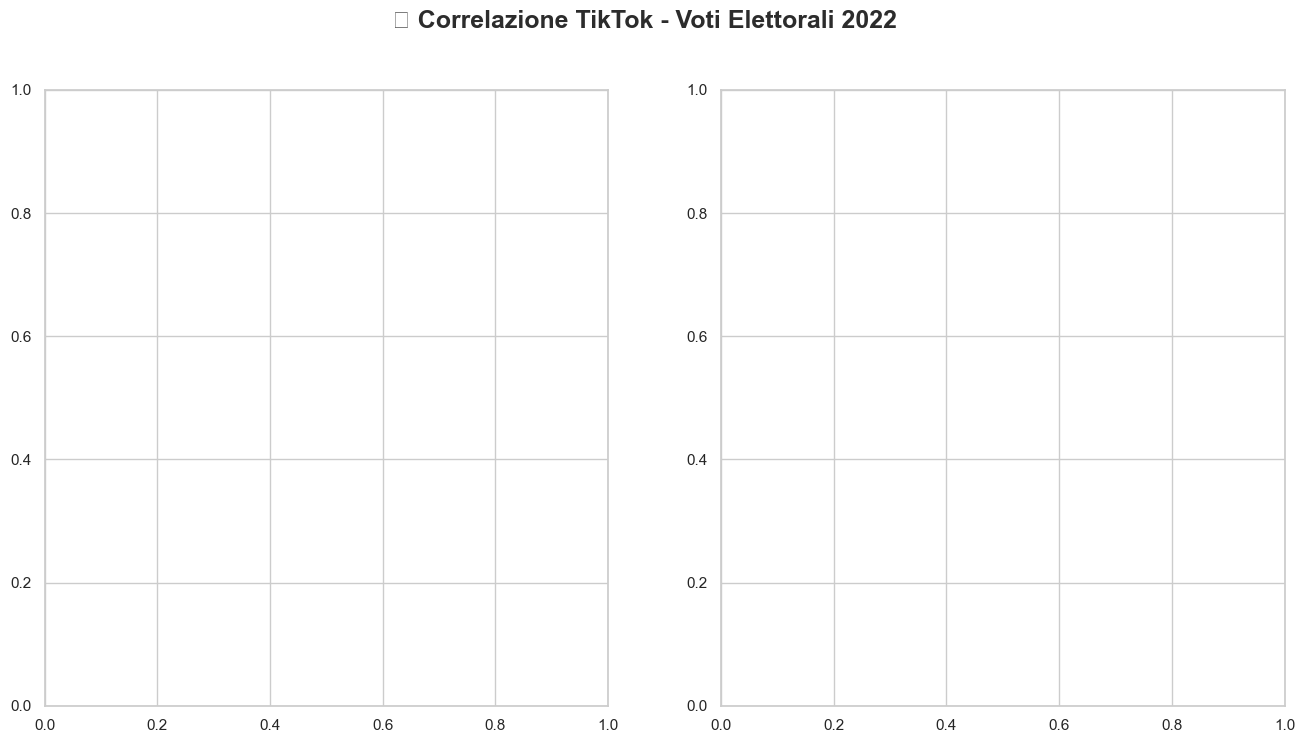

📊 Creazione matrice di correlazione...


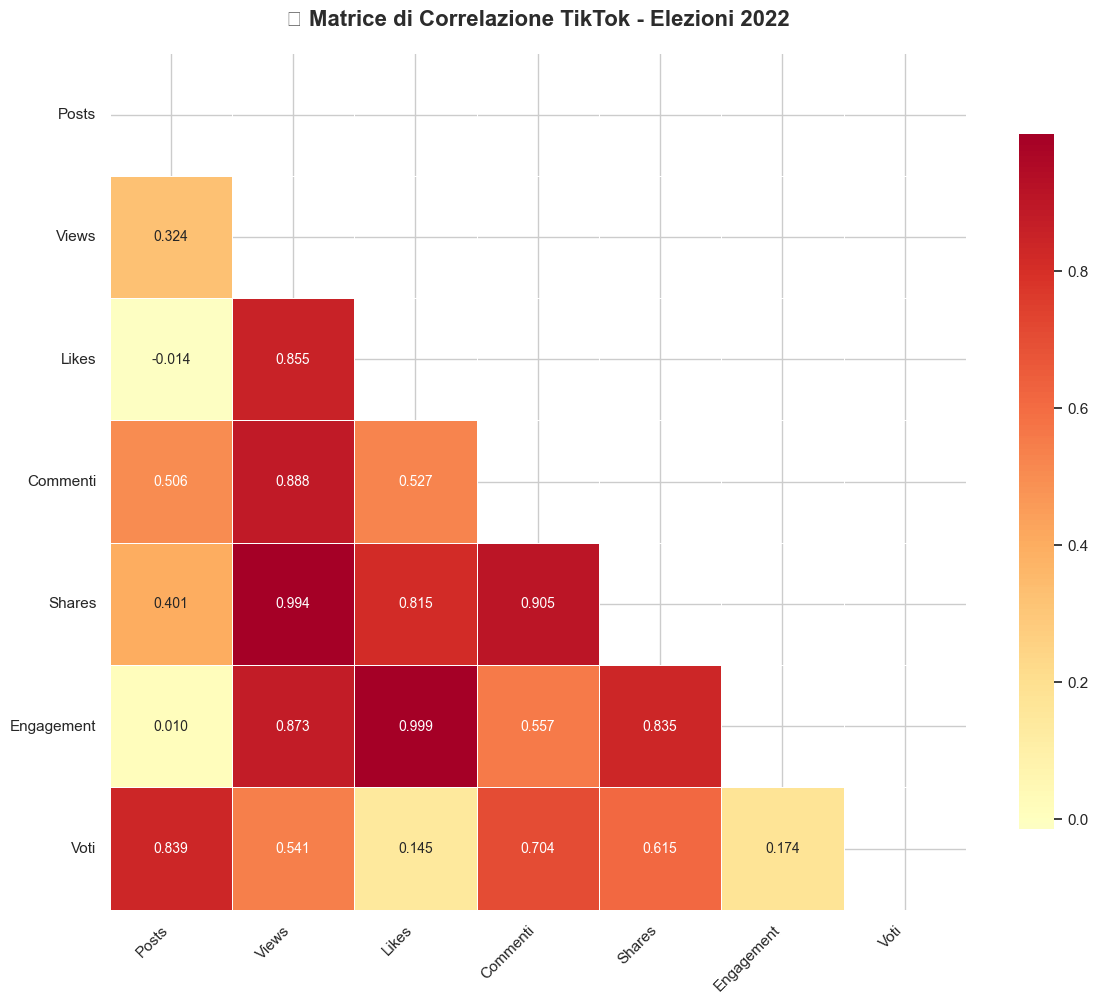


🎯 CORRELAZIONI PIÙ SIGNIFICATIVE CON I VOTI:
   • NUMERO_POST_TIKTOK: 0.839
   • TOTALE_COMMENTI_TIKTOK: 0.704
   • TOTALE_SHARES_TIKTOK: 0.615
   • TOTALE_VIEWS_TIKTOK: 0.541
   • ENGAGEMENT_TOTALE: 0.174
   • TOTALE_LIKES_TIKTOK: 0.145


In [ ]:
# 🔥 MATRICE DI CORRELAZIONE COMPLETA
print("📊 Creazione matrice di correlazione...")

# Seleziono le variabili per la correlazione
correlation_vars = [
    'NUMERO_POST_TIKTOK', 
    'TOTALE_VIEWS_TIKTOK', 
    'TOTALE_LIKES_TIKTOK',
    'TOTALE_COMMENTI_TIKTOK',
    'TOTALE_SHARES_TIKTOK',
    'ENGAGEMENT_TOTALE',
    'TOTALE_VOTI_LISTA'
]

# Creo matrice di correlazione
corr_matrix = merged_data[correlation_vars].corr()

# Grafico matrice di correlazione
fig, ax = plt.subplots(figsize=(12, 10))

# Heatmap con seaborn
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Maschera triangolo superiore
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True, 
            fmt='.3f',
            cbar_kws={'shrink': 0.8},
            ax=ax,
            linewidths=0.5)

# Titoli e labels
ax.set_title('🔥 Matrice di Correlazione TikTok - Elezioni 2022', 
             fontsize=16, fontweight='bold', color=TIKTOK_COLORS['dark'], pad=20)

# Ruota le etichette per migliore leggibilità
labels = ['Posts', 'Views', 'Likes', 'Commenti', 'Shares', 'Engagement', 'Voti']
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0)

plt.tight_layout()
plt.show()

# Stampa correlazioni più significative
print(f"\n🎯 CORRELAZIONI PIÙ SIGNIFICATIVE CON I VOTI:")
voti_corrs = corr_matrix['TOTALE_VOTI_LISTA'].drop('TOTALE_VOTI_LISTA').sort_values(key=abs, ascending=False)
for var, corr in voti_corrs.items():
    print(f"   • {var}: {corr:.3f}")

In [ ]:
# 📋 SUMMARY FINALE E INTERPRETAZIONE
print("📋 SUMMARY CORRELAZIONE ENGAGEMENT vs VOTI")
print("=" * 60)

# Identifica la correlazione più forte
strongest_corr_var = corr_matrix['TOTALE_VOTI_LISTA'].drop('TOTALE_VOTI_LISTA').abs().idxmax()
strongest_corr_value = corr_matrix['TOTALE_VOTI_LISTA'][strongest_corr_var]

print(f"🎯 RISULTATO PRINCIPALE:")
print(f"   La variabile TikTok più correlata ai voti è: {strongest_corr_var}")
print(f"   Coefficiente di correlazione: r = {strongest_corr_value:.3f}")

# Test di significatività per la correlazione più forte
if strongest_corr_var == 'NUMERO_POST_TIKTOK':
    sig_test = p_posts
elif strongest_corr_var == 'ENGAGEMENT_TOTALE':
    sig_test = p_eng
else:
    sig_test = p_views

print(f"   P-value: {sig_test:.3f}")
print(f"   Significatività: {'✅ SIGNIFICATIVA' if sig_test < 0.05 else '❌ NON significativa'}")

print(f"\n📊 INTERPRETAZIONE:")
if abs(strongest_corr_value) > 0.7:
    strength = "FORTE"
elif abs(strongest_corr_value) > 0.5:
    strength = "MODERATA"
else:
    strength = "DEBOLE"

print(f"   • Correlazione {strength} ({abs(strongest_corr_value):.3f})")
print(f"   • Direzione: {'POSITIVA' if strongest_corr_value > 0 else 'NEGATIVA'}")

if strongest_corr_value > 0:
    print(f"   • Maggiore attività TikTok → Più voti ricevuti")
else:
    print(f"   • Maggiore attività TikTok → Meno voti ricevuti")

print(f"\n🏆 TOP 3 PARTITI per {strongest_corr_var}:")
top3 = merged_data.nlargest(3, strongest_corr_var)[['PARTITO', strongest_corr_var, 'TOTALE_VOTI_LISTA']]
for i, (_, row) in enumerate(top3.iterrows(), 1):
    print(f"   {i}. {row['PARTITO'][:25]}")
    print(f"      {strongest_corr_var}: {row[strongest_corr_var]:,}")
    print(f"      Voti: {row['TOTALE_VOTI_LISTA']:,}")

print(f"\n✅ CONCLUSIONE:")
if sig_test < 0.05 and abs(strongest_corr_value) > 0.5:
    print("   C'È una correlazione significativa tra engagement TikTok e voti!")
    print("   L'attività su TikTok può essere un predittore dei risultati elettorali.")
else:
    print("   Non c'è evidenza di correlazione significativa.")
    print("   L'attività TikTok non predice i risultati elettorali.")

📋 SUMMARY CORRELAZIONE ENGAGEMENT vs VOTI
🎯 RISULTATO PRINCIPALE:
   La variabile TikTok più correlata ai voti è: NUMERO_POST_TIKTOK
   Coefficiente di correlazione: r = 0.839
   P-value: 0.009
   Significatività: ✅ SIGNIFICATIVA

📊 INTERPRETAZIONE:
   • Correlazione FORTE (0.839)
   • Direzione: POSITIVA
   • Maggiore attività TikTok → Più voti ricevuti

🏆 TOP 3 PARTITI per NUMERO_POST_TIKTOK:
   1. FRATELLI D'ITALIA CON GIO
      NUMERO_POST_TIKTOK: 54
      Voti: 7,096,109
   2. PARTITO DEMOCRATICO - ITA
      NUMERO_POST_TIKTOK: 51
      Voti: 5,126,682
   3. LEGA PER SALVINI PREMIER
      NUMERO_POST_TIKTOK: 42
      Voti: 2,392,501

✅ CONCLUSIONE:
   C'È una correlazione significativa tra engagement TikTok e voti!
   L'attività su TikTok può essere un predittore dei risultati elettorali.


🔧 Creazione dashboard risultati preprocessing con Matplotlib...


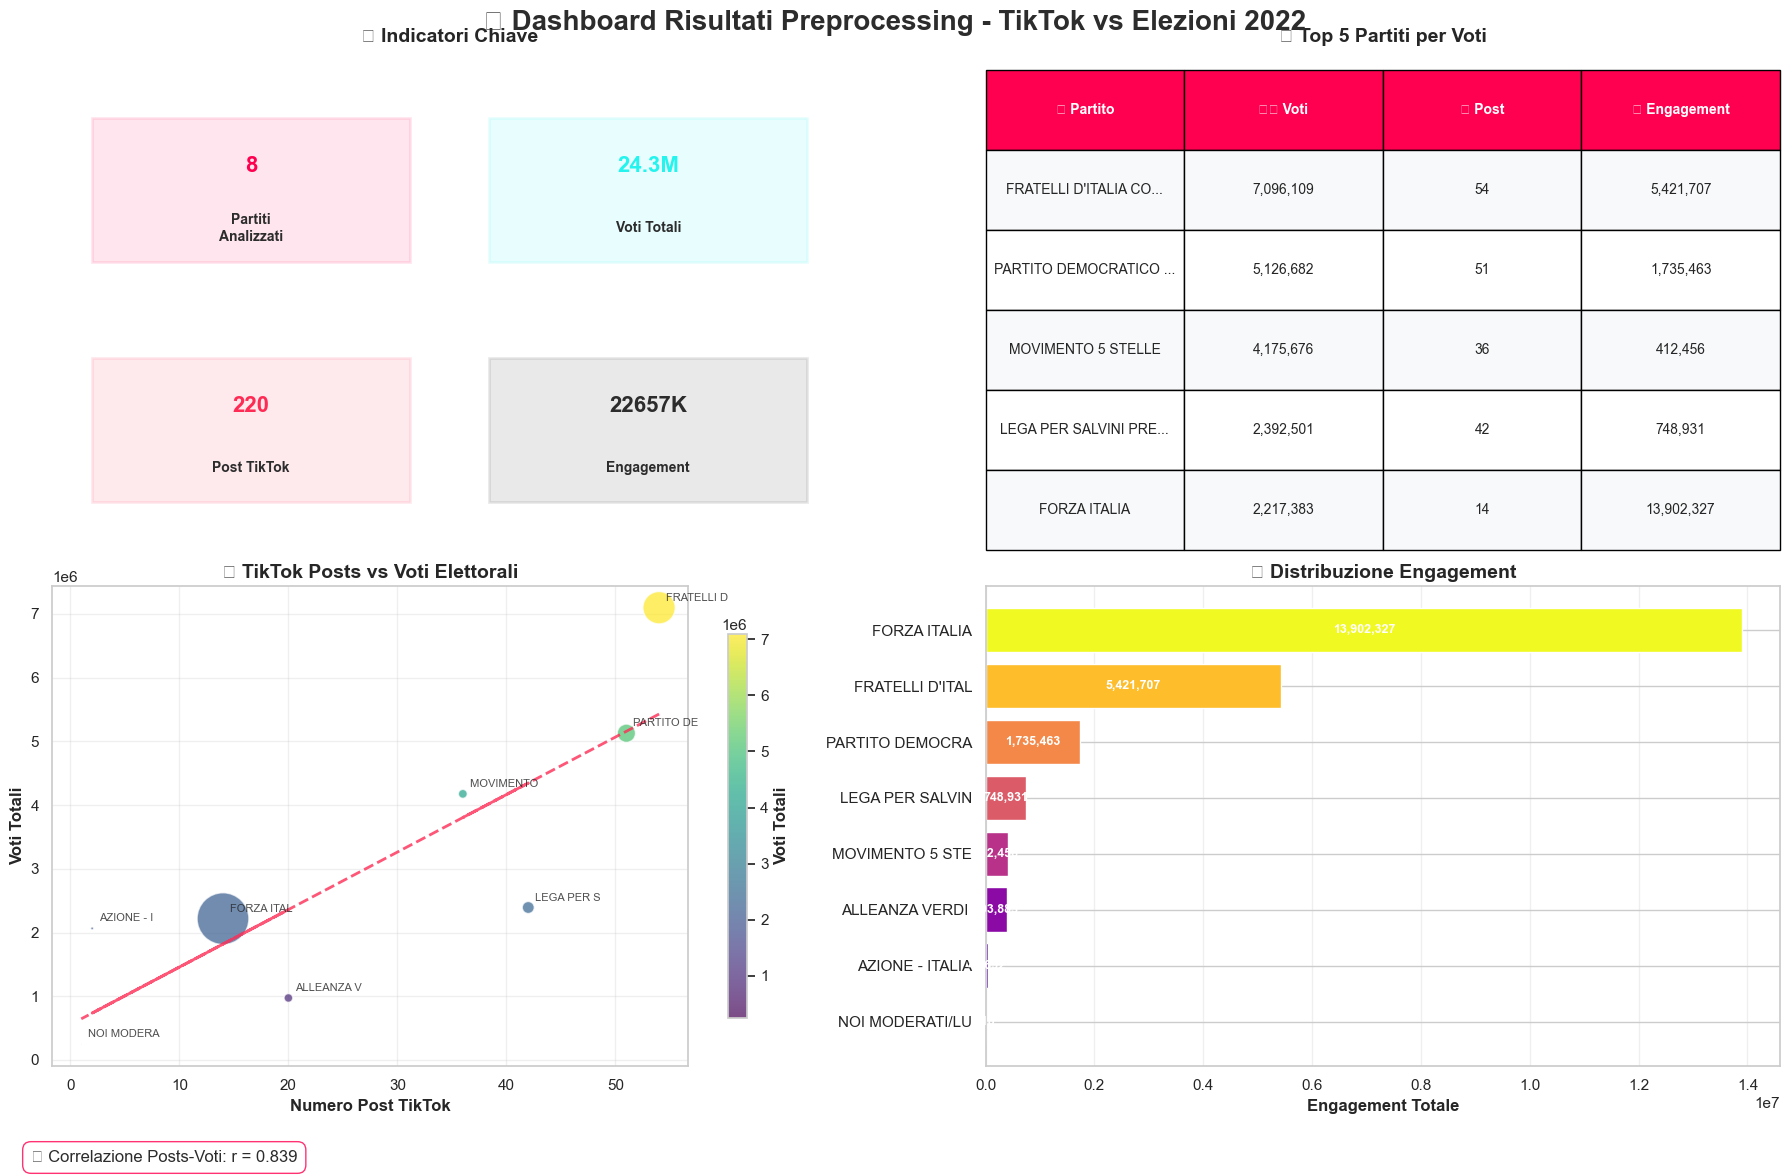


📈 SOMMARIO PREPROCESSING:
   🎭 Partiti analizzati: 8
   🗳️ Voti totali: 24,294,601
   📱 Post TikTok totali: 220
   💝 Engagement totale: 22,656,879
   📊 Correlazione Posts-Voti: r = 0.839
✅ Dashboard preprocessing completata con Matplotlib!


In [ ]:
# 📊 DASHBOARD RISULTATI PREPROCESSING (Matplotlib)
print("🔧 Creazione dashboard risultati preprocessing con Matplotlib...")

# Verifico che merged_data esista
if 'merged_data' not in locals():
    print("⚠️ merged_data non trovato. Assicurati di aver eseguito il preprocessing.")
else:
    # Dati principali
    total_parties = len(merged_data)
    total_votes = merged_data['TOTALE_VOTI_LISTA'].sum()
    total_posts = merged_data['NUMERO_POST_TIKTOK'].sum()
    total_engagement = merged_data['ENGAGEMENT_TOTALE'].sum()
    top5_parties = merged_data.nlargest(5, 'TOTALE_VOTI_LISTA')
    engagement_sorted = merged_data.sort_values('ENGAGEMENT_TOTALE', ascending=True)
    
    # Correlazione
    correlation_posts_votes = np.corrcoef(
        merged_data['NUMERO_POST_TIKTOK'], 
        merged_data['TOTALE_VOTI_LISTA']
    )[0,1]
    
    # Creo figure con 4 subplot
    fig = plt.figure(figsize=(18, 12))
    fig.suptitle('🔍 Dashboard Risultati Preprocessing - TikTok vs Elezioni 2022', 
                 fontsize=20, fontweight='bold', color=TIKTOK_COLORS['dark'])
    
    # === PANEL 1: INDICATORI CHIAVE ===
    ax1 = plt.subplot(2, 2, 1)
    ax1.axis('off')
    
    # Indicatori principali in formato card
    indicators = [
        {'value': total_parties, 'label': 'Partiti\nAnalizzati', 'color': TIKTOK_COLORS['primary']},
        {'value': f"{total_votes/1000000:.1f}M", 'label': 'Voti Totali', 'color': TIKTOK_COLORS['secondary']},
        {'value': total_posts, 'label': 'Post TikTok', 'color': TIKTOK_COLORS['accent']},
        {'value': f"{total_engagement/1000:.0f}K", 'label': 'Engagement', 'color': TIKTOK_COLORS['dark']}
    ]
    
    for i, ind in enumerate(indicators):
        x = (i % 2) * 0.5 + 0.25
        y = 0.75 if i < 2 else 0.25
        
        # Rettangolo colorato
        rect = plt.Rectangle((x-0.2, y-0.15), 0.4, 0.3, 
                           facecolor=ind['color'], alpha=0.1, 
                           edgecolor=ind['color'], linewidth=2)
        ax1.add_patch(rect)
        
        # Valore
        ax1.text(x, y+0.05, str(ind['value']), ha='center', va='center',
                fontsize=16, fontweight='bold', color=ind['color'])
        
        # Label
        ax1.text(x, y-0.08, ind['label'], ha='center', va='center',
                fontsize=10, fontweight='bold', color=TIKTOK_COLORS['dark'])
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_title('📈 Indicatori Chiave', fontsize=14, fontweight='bold', pad=20)
    
    # === PANEL 2: TABELLA TOP 5 PARTITI ===
    ax2 = plt.subplot(2, 2, 2)
    ax2.axis('off')
    
    # Creo tabella manualmente
    table_data = []
    for _, row in top5_parties.iterrows():
        party_name = row['PARTITO'][:20] + '...' if len(row['PARTITO']) > 20 else row['PARTITO']
        table_data.append([
            party_name,
            f"{row['TOTALE_VOTI_LISTA']:,}",
            f"{row['NUMERO_POST_TIKTOK']}",
            f"{row['ENGAGEMENT_TOTALE']:,}"
        ])
    
    # Tabella con matplotlib
    table = ax2.table(cellText=table_data,
                     colLabels=['🎭 Partito', '🗳️ Voti', '📱 Post', '💝 Engagement'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])
    
    # Styling tabella
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Header styling
    for i in range(4):
        table[(0, i)].set_facecolor(TIKTOK_COLORS['primary'])
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Rows alternating colors
    for i in range(1, len(table_data) + 1):
        color = 'white' if i % 2 == 0 else '#f8f9fa'
        for j in range(4):
            table[(i, j)].set_facecolor(color)
    
    ax2.set_title('🏆 Top 5 Partiti per Voti', fontsize=14, fontweight='bold', pad=20)
    
    # === PANEL 3: SCATTER PLOT POSTS vs VOTI ===
    ax3 = plt.subplot(2, 2, 3)
    
    # Scatter plot con dimensioni proporzionali all'engagement
    sizes = merged_data['ENGAGEMENT_TOTALE'] / 10000  # Scala per dimensioni
    colors = merged_data['TOTALE_VOTI_LISTA']
    
    scatter = ax3.scatter(merged_data['NUMERO_POST_TIKTOK'], 
                         merged_data['TOTALE_VOTI_LISTA'],
                         s=sizes, c=colors, 
                         cmap='viridis', alpha=0.7,
                         edgecolors='white', linewidth=1)
    
    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax3, shrink=0.8)
    cbar.set_label('Voti Totali', fontweight='bold')
    
    # Annotazioni partiti
    for _, row in merged_data.iterrows():
        ax3.annotate(row['PARTITO'][:10], 
                    (row['NUMERO_POST_TIKTOK'], row['TOTALE_VOTI_LISTA']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)
    
    # Linea di tendenza
    z = np.polyfit(merged_data['NUMERO_POST_TIKTOK'], merged_data['TOTALE_VOTI_LISTA'], 1)
    p = np.poly1d(z)
    ax3.plot(merged_data['NUMERO_POST_TIKTOK'], 
             p(merged_data['NUMERO_POST_TIKTOK']), 
             "--", color=TIKTOK_COLORS['accent'], alpha=0.8, linewidth=2)
    
    ax3.set_xlabel('Numero Post TikTok', fontweight='bold')
    ax3.set_ylabel('Voti Totali', fontweight='bold')
    ax3.set_title('📱 TikTok Posts vs Voti Elettorali', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # === PANEL 4: BAR CHART ENGAGEMENT ===
    ax4 = plt.subplot(2, 2, 4)
    
    # Bar chart orizzontale
    party_names = [party[:15] for party in engagement_sorted['PARTITO']]
    engagement_values = engagement_sorted['ENGAGEMENT_TOTALE']
    
    # Gradient di colori
    colors_gradient = plt.cm.plasma(np.linspace(0, 1, len(engagement_values)))
    
    bars = ax4.barh(party_names, engagement_values, 
                    color=colors_gradient, edgecolor='white', linewidth=1)
    
    # Testi sui bar
    for i, (bar, value) in enumerate(zip(bars, engagement_values)):
        width = bar.get_width()
        ax4.text(width/2, bar.get_y() + bar.get_height()/2, 
                f'{value:,.0f}', ha='center', va='center',
                color='white', fontweight='bold', fontsize=9)
    
    ax4.set_xlabel('Engagement Totale', fontweight='bold')
    ax4.set_title('📊 Distribuzione Engagement', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')
    
    # === ANNOTAZIONE CORRELAZIONE ===
    fig.text(0.02, 0.02, 
             f"📊 Correlazione Posts-Voti: r = {correlation_posts_votes:.3f}",
             fontsize=12, color=TIKTOK_COLORS['dark'], 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor=TIKTOK_COLORS['primary'], alpha=0.8))
    
    # === LAYOUT FINALE ===
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, bottom=0.1)
    fig.patch.set_facecolor('white')
    
    plt.show()
    
    # Stampo sommario statistico
    print(f"\n📈 SOMMARIO PREPROCESSING:")
    print(f"   🎭 Partiti analizzati: {total_parties}")
    print(f"   🗳️ Voti totali: {total_votes:,}")
    print(f"   📱 Post TikTok totali: {total_posts}")
    print(f"   💝 Engagement totale: {total_engagement:,}")
    print(f"   📊 Correlazione Posts-Voti: r = {correlation_posts_votes:.3f}")
    print("✅ Dashboard preprocessing completata con Matplotlib!")